In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
# Calculate the date 1 year ago from today (2017 to 2018 pulls up blank so I supplemented 2016 to 2017)

engine.execute("SELECT * FROM measurement WHERE date = '2016-10-05'").fetchall()

[(2407, 'USC00519397', '2016-10-05', 0.0, 80.0),
 (5134, 'USC00513117', '2016-10-05', 0.0, 77.0),
 (7367, 'USC00514830', '2016-10-05', 0.0, 80.0),
 (8851, 'USC00517948', '2016-10-05', None, 80.0),
 (11893, 'USC00519523', '2016-10-05', 0.0, 80.0),
 (14651, 'USC00519281', '2016-10-05', 0.01, 79.0),
 (19244, 'USC00516128', '2016-10-05', 0.81, 75.0)]

# Exploratory Climate Analysis

In [14]:
# Query all tobs values
results = session.query(Measurement.tobs).all()

# Convert list of tuples into normal list
tobs_values = list(np.ravel(results))
tobs_values

[65.0,
 63.0,
 74.0,
 76.0,
 73.0,
 70.0,
 64.0,
 68.0,
 73.0,
 64.0,
 61.0,
 66.0,
 65.0,
 68.0,
 64.0,
 72.0,
 66.0,
 66.0,
 69.0,
 67.0,
 67.0,
 71.0,
 67.0,
 76.0,
 68.0,
 72.0,
 70.0,
 67.0,
 66.0,
 67.0,
 69.0,
 67.0,
 67.0,
 64.0,
 69.0,
 73.0,
 73.0,
 69.0,
 69.0,
 69.0,
 71.0,
 61.0,
 69.0,
 63.0,
 64.0,
 65.0,
 67.0,
 68.0,
 65.0,
 76.0,
 75.0,
 66.0,
 70.0,
 72.0,
 73.0,
 70.0,
 71.0,
 72.0,
 72.0,
 69.0,
 70.0,
 73.0,
 72.0,
 73.0,
 70.0,
 71.0,
 68.0,
 70.0,
 72.0,
 69.0,
 68.0,
 74.0,
 72.0,
 72.0,
 73.0,
 74.0,
 73.0,
 73.0,
 74.0,
 74.0,
 74.0,
 71.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 73.0,
 73.0,
 71.0,
 71.0,
 68.0,
 70.0,
 71.0,
 74.0,
 71.0,
 75.0,
 76.0,
 75.0,
 75.0,
 76.0,
 76.0,
 76.0,
 77.0,
 77.0,
 73.0,
 74.0,
 76.0,
 76.0,
 80.0,
 74.0,
 77.0,
 77.0,
 76.0,
 77.0,
 78.0,
 78.0,
 75.0,
 73.0,
 77.0,
 76.0,
 77.0,
 77.0,
 78.0,
 75.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 77.0,
 77.0,
 77.0,
 78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,

In [15]:
# Query for 12 months of precipitation (note:2017 to 2018 showed blank so I used 2016 to 2017)
year_rain = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-10-05').filter(Measurement.date <= '2017-10-05').order_by(Measurement.date).all()

In [16]:
# Set above query results to dataframe
year_rain_df = pd.DataFrame(data=year_rain)
year_rain_df.head(30)

,date,prcp
0,2016-10-05,0.00
1,2016-10-05,0.00
2,2016-10-05,0.00
3,2016-10-05,NaN
4,2016-10-05,0.00
5,2016-10-05,0.01
6,2016-10-05,0.81
7,2016-10-06,0.00
8,2016-10-06,0.05
9,2016-10-06,0.00


In [17]:
year_rain_df = year_rain_df.set_index("date")
year_rain_df.head(20)

,prcp
date,
2016-10-05,0.00
2016-10-05,0.00
2016-10-05,0.00
2016-10-05,NaN
2016-10-05,0.00
2016-10-05,0.01
2016-10-05,0.81
2016-10-06,0.00
2016-10-06,0.05


No handles with labels found to put in legend.


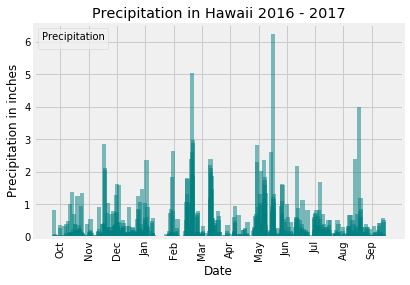

In [18]:

#Plot data
plt.title("Precipitation in Hawaii 2016 - 2017")
plt.xlabel("Date")
plt.ylabel("Precipitation in inches")
plt.xticks(rotation='90')

plt.tight_layout()

# Define X and Y values
y = year_rain_df["prcp"].tolist()
x = np.arange(0, len(year_rain_df.index.tolist()), 1)

months = ["Oct","Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep"]

month_total = len(y)
month_step_xticks = int((month_total / 12)*1.03)
plt.ylim = max(y) + 1
tick_locations = [x+55 for x in range(1, month_total, month_step_xticks)]

plt.bar(x, y, width=25, color="teal", alpha=0.5, align="edge")
plt.xticks(tick_locations, months)
plt.legend(fontsize="small",loc="best", title="Precipitation") 


In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_rain_df.describe()

,prcp
count,1771.000000
mean,0.159074
std,0.419431
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


In [20]:
# How many stations are available in this dataset?
session.query(Measurement.station).distinct().count()

9

In [21]:
# What are the most active stations?
# List the stations and the counts in descending order.
engine.execute("SELECT count(station), station FROM measurement GROUP BY station ORDER BY count(station) DESC").fetchall()

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [22]:
# Make a DataFrame for most active stations.
active_stations_desc = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active_stations_df = pd.DataFrame(data=active_stations_desc, columns=['Station', 'Count'])
active_stations_df.head()

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
active_stations = session.query(Measurement.station, 
                                    func.count(Measurement.station).\
                                    label('count')).\
                                    group_by(Measurement.station).\
                                    order_by('count DESC').limit(1)[0][0]

recordings = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
                
session.query(*recordings).filter(Measurement.station==active_stations).all()

/anaconda3/lib/python3.6/site-packages/sqlalchemy/sql/compiler.py:643: SAWarning: Can't resolve label reference 'count DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


[(54.0, 85.0, 71.66378066378067)]

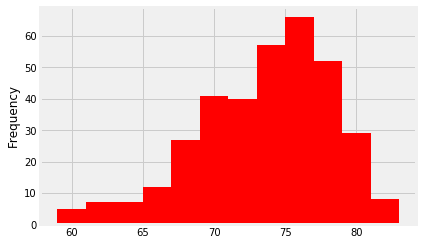

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Design a query to retrieve the last 12 months of precipitation data and plot the results

most_recent_date = session.query(Measurement).order_by(Measurement.date.desc()).limit(1)
    
for date in most_recent_date:
    most_recent_temp = date.date

most_recent_temp = dt.datetime.strptime(most_recent_temp, "%Y-%m-%d")

# Calculate the date 1 year ago from today
one_year = most_recent_temp - dt.timedelta(days=365)


highest_temps = session.query(Measurement.tobs).\
                                filter(Measurement.station==active_stations).\
                                filter(Measurement.date >= one_year).\
                                order_by(Measurement.date.desc()).all()

x = [x[0] for x in highest_temps]
# bins = [x for x in range(12)]

plt.hist(x, color= 'red', bins=12)
plt.ylabel('Frequency')
plt.show()

In [25]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [35]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temps = calc_temps('2012-02-28', '2012-03-05')
temps

[(62.0, 69.57142857142857, 74.0)]

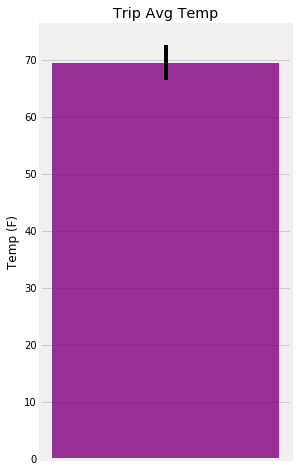

In [36]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
lower = temps[0][1] - temps[0][0]
upper = temps[0][2] - temps[0][1]

plt.figure(figsize=(4,8))
plt.bar(0, temps[0][1], yerr=[upper-lower], color='purple', alpha=0.8)
plt.title('Trip Avg Temp')
plt.xticks([])
plt.ylabel('Temp (F)')

plt.show()

In [37]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def collect_rainfall(start_date, end_date):
    return session.query(Measurement.station, 
                         Measurement.prcp.label('rainfall'),
                         Station.latitude,
                         Station.longitude,
                         Station.elevation).\
                            group_by(Measurement.station).\
                            join(Station, Measurement.station == Station.station).\
                            filter(Measurement.date >= start_date).\
                            filter(Measurement.date <= end_date).\
                            order_by('rainfall DESC').all()

collect_rainfall('2012-02-28', '2012-03-05')


/anaconda3/lib/python3.6/site-packages/sqlalchemy/sql/compiler.py:643: SAWarning: Can't resolve label reference 'rainfall DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


[('USC00519281', 6.24, 21.45167, -157.84888999999998, 32.9),
 ('USC00513117', 5.71, 21.4234, -157.8015, 14.6),
 ('USC00516128', 5.37, 21.3331, -157.8025, 152.4),
 ('USC00519523', 2.71, 21.33556, -157.71139, 19.5),
 ('USC00519397', 1.08, 21.2716, -157.8168, 3.0),
 ('USC00518838', 0.92, 21.4992, -158.0111, 306.6),
 ('USC00511918', 0.7, 21.3152, -157.9992, 0.9),
 ('USC00514830', None, 21.5213, -157.8374, 7.0),
 ('USC00517948', None, 21.3934, -157.9751, 11.9)]

## Optional Challenge Assignment

In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [31]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [32]:
# Plot the daily normals as an area plot with `stacked=False`
